<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Time%20Series%20Analysis%20in%20Python/1%20Correlation%20and%20Autocorrelation/1%20Correlation_and_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A "Thin" Application of Time Series
Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the pandas basics Cheat Sheet and keep it handy!

**Instructions**

1. Convert the date index to datetime using pandas's to_datetime().

2. Plot the time series and set the argument grid to True to better see the year-ends.

3. Slice the diet dataset to keep only values from 2012, assigning to diet2012.
Plot the diet2012, again creating gridlines with the grid argument.

**Conclusion**

Notice how searches for 'diet' spiked up after the holidays every year.

In [ ]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

# Slice the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

# Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from FRED, are pre-loaded in DataFrames stocks and bonds.

Instructions

1. Convert the dates in the stocks.index and bonds.index into sets.

2. Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.

3. Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, which has the syntax df1.join(df2).

4. To get the intersection of dates, use the argument how='inner'.

Conclusions

Pandas helps make many time series tasks quick and efficient.

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how = 'inner')

'''
<script.py> output:
    {'2015-10-12', '2009-10-12', '2017-06-09', '2009-11-11', '2012-10-08', '2012-11-12', '2008-11-11', '2007-11-12', '2016-11-11', '2011-10-10', '2014-10-13', '2007-10-08', '2010-11-11', '2008-10-13', '2014-11-11', '2013-11-11', '2010-10-11', '2016-10-10', '2011-11-11', '2013-10-14', '2015-11-11'}

<script.py> output:
    {'2015-10-12', '2009-10-12', '2017-06-09', '2009-11-11', '2012-10-08', '2012-11-12', '2008-11-11', '2007-11-12', '2016-11-11', '2011-10-10', '2014-10-13', '2007-10-08', '2010-11-11', '2008-10-13', '2014-11-11', '2013-11-11', '2010-10-11', '2016-10-10', '2011-11-11', '2013-10-14', '2015-11-11'}
'''

# Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y

The pandas and plotting modules have already been imported for you. For the remainder of the course, pandas is imported as pd and matplotlib.pyplot is imported as plt.

Instructions

1. Compute percent changes on the stocks_and_bonds DataFrame using the .pct_change() method and call the new DataFrame returns.

2. Compute the correlation of the columns SP500 and US10Y in the returns DataFrame using the .corr() method for Series which has the syntax series1.corr(series2).

3. Show a scatter plot of the percentage change in stock and bond yields.

Conclusion

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

In [ ]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'],(returns['US10Y']))
plt.show()

'''
<script.py> output:
    Correlation of stocks and interest rates:  0.4119448886249272
'''

# Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame levels contains the levels of DJI and UFO. UFO data was downloaded from www.nuforc.org.

Instructions

1. Calculate the correlation of the columns DJI and UFO.

2. Create a new DataFrame of changes using the .pct_change() method.

3. Re-calculate the correlation of the columns DJI and UFO on the changes.

Conclusion

Great work! Notice that the correlation on levels is high but the correlation on changes is close to zero.

In [ ]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

'''
<script.py> output:
    Correlation of levels:  0.9399762210726432
    Correlation of changes:  0.06026935462405376
'''

# Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the  in the regression 
). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

The module statsmodels.api has been imported for you as sm.

Instructions

1. Compute the correlation between x and y using the .corr() method.

2. Run a regression:

 - First convert the Series x to a DataFrame dfx.
 - Add a constant using sm.add_constant(), assigning it to dfx1
 - Regress y on dfx1 using sm.OLS().fit().

3. Print out the results of the regression and compare the R-squared with the correlation.

Conclusion

Notice that the two different methods of computing correlation give the same result. The correlation is about -0.9 and the R-squared is about 0.81

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

'''
<script.py> output:
    The correlation between x and y is -0.90
                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.818
    Model:                            OLS   Adj. R-squared:                  0.817
    Method:                 Least Squares   F-statistic:                     4471.
    Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
    Time:                        03:42:35   Log-Likelihood:                -560.10
    No. Observations:                1000   AIC:                             1124.
    Df Residuals:                     998   BIC:                             1134.
    Df Model:                           1                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const         -0.0052      0.013     -0.391      0.696      -0.032       0.021
    x             -0.9080      0.014    -66.869      0.000      -0.935      -0.881
    ==============================================================================
    Omnibus:                        0.048   Durbin-Watson:                   2.066
    Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.103
    Skew:                          -0.003   Prob(JB):                        0.950
    Kurtosis:                       2.951   Cond. No.                         1.03
    ==============================================================================
    
    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
'''

# Match Correlation with Regression Output
Here are four scatter plots, each showing a linear regression line and an R-squared:

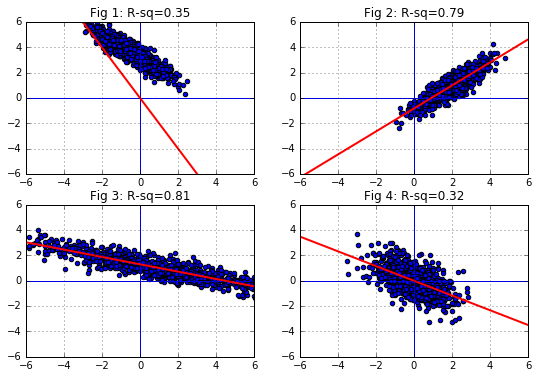

Which correlation is correct?

Wrong Answer

Fig 1: correlation = -0.6
- Notice that there is no intercept in the regression. Therefore, the R-squared here isn't the squared correlation.

Fig 2: correlation = -0.9
 - The slope of the red regression line is positive, so the correlation must be positive, not negative (i.e., the correlation is not -0.9 but +0.9).

Fig 4: correlation = -0.32
 - The correlation is the square root of the R-squared, not the R-squared.

Correct Answer

Fig 3: correlation = -0.9


# A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see here.

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

Instructions

1. Use the .resample() method with rule='W' and how='last'to convert daily data to weekly data.
 - The argument how in .resample() has been deprecated.
 - The new syntax .resample().last() also works.

2. Create a new DataFrame, returns, of percent changes in weekly prices using the .pct_change() method.

3. Compute the autocorrelation using the .autocorr() method on the series of closing stock prices, which is the column 'Adj Close' in the DataFrame returns.

Conclusion

Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'

In [ ]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

'''
<script.py> output:
    The autocorrelation of weekly returns is -0.16
'''

# Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

Instructions

1. Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.

2. Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.

3. Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.

 - The argument how in .resample() has been deprecated.
 - The new syntax .resample().last() also works.

4. Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

Conclusion

Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative



In [ ]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

'''
<script.py> output:
    The autocorrelation of daily interest rate changes is 0.07
    The autocorrelation of annual interest rate changes is -0.22
'''